---

#**Tecnológico de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

###**Curso:** Ciencia y Analítica de Datos

###**Profesora:** Dra. María de la Paz Rico Fernández

###**Actividad:** Regresiones

###**Alumno:** Francisco Javier Ramírez Arias

###**Matrícula:** A01316379

---

In [42]:
#Importan las librerias para realizar los entrenamientos
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Ejercicio 1
Utiliza la base de datos de https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [3]:
#Lectura de la base de datos
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df = df.sort_values(by =["Number of Units"])
df.sample(10)

,Number of Units,Manufacturing Cost
878,5.980289,37.426675
150,3.096392,42.231657
813,5.585687,35.132755
182,3.244790,51.345094
865,5.892589,28.767268
750,5.324965,30.998613
304,3.801138,45.947419
461,4.305633,41.501175
622,4.918345,38.763193
67,2.520240,61.879641


In [4]:
#Variables y Targets
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [5]:
#longitud de los datos
len(X)

1000

In [7]:
#Descripción de los datos
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

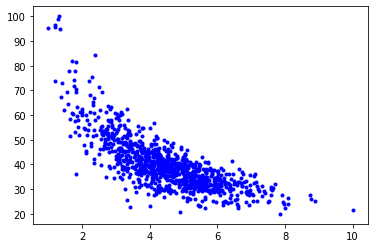

In [9]:
#Graficado de los datos
plt.plot(X,y,'b.')

In [10]:
#Division de los datos de entrenamiento y prueba
#85% Entrenamiento
#15% Prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)


In [17]:
#Listado de Resultados
resultados_MAE = list()
resultados_R2 = list()

##1er. Modelo (Regresión Lineal)

In [14]:
lr_mdl = LinearRegression()      #Creación del objeto: Modelo Regresion Lineal 

lr_mdl.fit(X_train, y_train)     #Entrenamiento del modelo

lr_mdl.coef_, lr_mdl.intercept_  #Impresión de Coeficientes

(array([-5.91602323]), 66.44764675174278)

###Modelo de estimación obtenido:

$\hat{y} = -5.91X + 66.44$

In [18]:
#Predicciones del modelo
y_pred = lr_mdl.predict(X_test)

#Metrícas del modelo de Regresión Lineal
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.011595088997378
Root Mean Squared Error: 7.2416891490838875
r2_score 0.6171440942171167


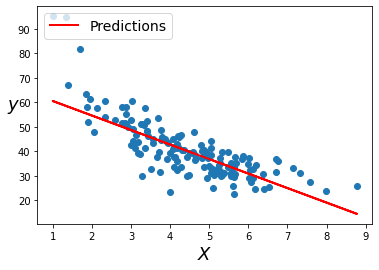

In [19]:
#Visualizacion de los datos
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

##2do. Modelo (Regresión Polinomial)

In [20]:
df = df.sort_values(by =["Number of Units"])
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [22]:
#Transformación de los datos por medio combinaciones polinomiales
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [23]:
#Entrenamiento del modelos lineal utilizando la transformación polinomial
lrp_mdl = LinearRegression()
lrp_mdl.fit(X_train_poly, y_train)
lrp_mdl.coef_, lrp_mdl.intercept_

(array([[-16.27563255,   1.12121998]]), array([88.38865903]))

###Modelo de estimación obtenido:

$\hat{y} = -16.27X + 1.12X^2 + 88.38$

In [25]:
#Predicciones del modelo utilizando caracteristicas polinomial
X_test_poly = poly_features.transform(X_test)
y_pred_poly = lrp_mdl.predict(X_test_poly)

#Metrícas del modelo utilizando caracteristicas polinomiales
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poly))
resultados_MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2_score(y_test,  y_pred_poly))
resultados_R2.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.459445302443204
Root Mean Squared Error: 6.081945518433532
r2_score 0.7299521995869951


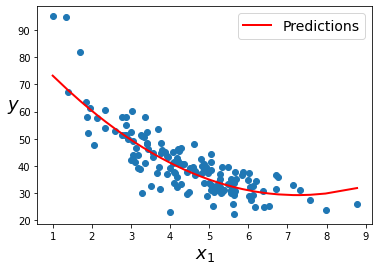

In [26]:
#Visualización de los datos 
plt.scatter(X_test, y_test)
orders = np.argsort(X_test.ravel())
plt.plot(X_test[orders], y_pred_poly[orders],"r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
#plt.axis([-3, 3, 0, 10]);

##3er. Modelo (Ridge)

In [29]:
rg_mdl = Ridge(alpha=10)          #Se Crea el Objeto del Modelo de Ridge

rg_mdl.fit(X_train, y_train)      #Entrenamiento del modelo

rg_mdl.coef_, rg_mdl.intercept_   #Coeficientes del modelo

(array([[-5.87659697]]), array([66.27108884]))

###Modelo de estimación obtenido:

$\hat{y} = -5.87X + 66.27$

In [31]:
#Predicciones del modelo
y_pred = rg_mdl.predict(X_test)

#Metrícas del modelo de Ridge
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2.append(r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 5.016051426768459
Root Mean Squared Error: 7.249504969195872
r2_score 0.6163172297628912


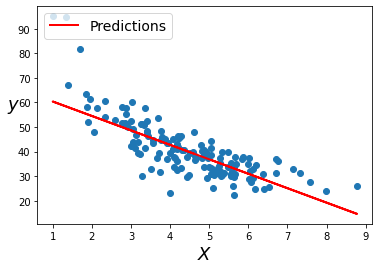

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

##4to. Modelo (Lasso)

In [35]:
#Se crea el objeto del Modelo de Lasso
lso_mdl = Lasso(alpha=0.5)
#Entrenamiento del modelo
lso_mdl.fit(X_train, y_train)
lso_mdl.coef_, lso_mdl.intercept_

(array([-5.6308895]), array([65.1707664]))

###Modelo de estimación obtenido:

$\hat{y} = -5.63X + 65.17$

In [36]:
#Predicciones del modelo
y_pred = lso_mdl.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.04382366553032
Root Mean Squared Error: 7.307403071860209
r2_score 0.6101641993198723


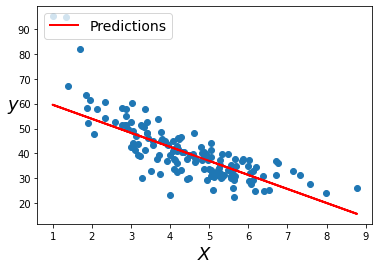

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

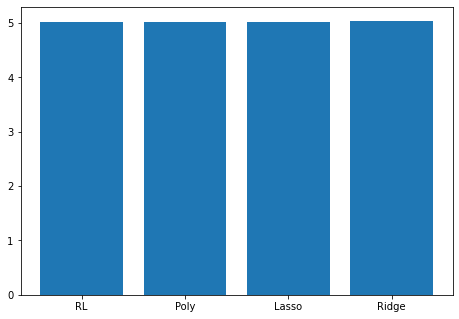

In [43]:
#Graficado de la metrica MAE de los cuatro modelos
mdl_names = ["RL","Poly","Lasso","Ridge"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdl_names,resultados_MAE)
plt.show()

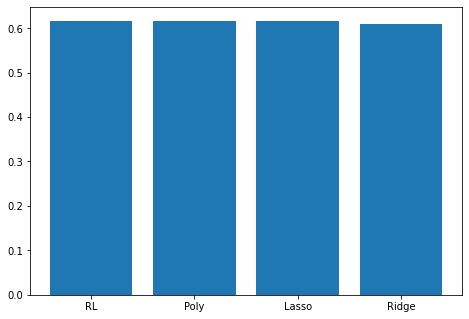

In [44]:
#Graficado de la metrica R2 de los cuatro modelos
mdl_names = ["RL","Poly","Lasso","Ridge"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdl_names,resultados_R2)
plt.show()

##Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El método que conviene más a la empresa es de Regresión Lineal utilizando características polinomiales, debido a que presenta el menor error absoluto promedio de los cuatro modelos, que es de 4.45. También es el modelo que presenta la mayor R2 de los cuatro modelos, esta se encuentra en 0.72. A diferencia de los otros modelos,  regresión lineal utilizando características polinomiales requiere de que la variable sea manipulada para obtener un conjunto de datos derivado, lo que le agrega cierta complejidad al modelo obtenido. Por otra parte los cuatro modelos entrenados presentan métricas similares como lo podemos apreciar en la gráfica de barras de la métrica MAE y R2. El porcentaje de entrenamiento utilizado fue de 85% de datos de entrenamiento y el 15% fue utilizado para prueba. El error obtenido para los diferentes modelos se encuentra entre el 5% aproximadamente. Lo cual es considerado bueno esto debido a que el error representa la magnitud entre la diferencia de la predicción y el valor de la observación, por lo que se espera que este sea el mínimo. Lo sabemos por qué lo estamos midiendo, graficando y observando en el comportamiento del modelo.



#**Ejercicio 2**
Realiza la regresión polinomial de los siguientes datos:

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4115,514500090,20140513T000000,550000.0,4,2.00,2250,7500,1.0,0,0,...,7,1200,1050,1956,0,98005,47.5877,-122.157,1440,7500
13147,5592900230,20141224T000000,320000.0,3,1.00,1270,7400,1.0,0,2,...,7,1270,0,1956,0,98056,47.4831,-122.191,1800,7400
10399,4415600030,20150316T000000,433000.0,3,2.75,2000,7200,1.0,0,0,...,7,1000,1000,1954,2014,98166,47.4531,-122.352,1440,7200
16195,3580900290,20150128T000000,360000.0,4,2.00,1450,8940,1.0,0,0,...,7,1450,0,1962,0,98034,47.7304,-122.240,1310,8914
8000,2895600090,20150407T000000,355200.0,3,1.00,1120,7320,1.0,0,0,...,7,1120,0,1954,0,98146,47.5103,-122.382,1410,6328
7291,4058200630,20141002T000000,353000.0,3,1.75,2190,7021,1.0,0,2,...,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
4510,3013300017,20150408T000000,535000.0,3,1.00,1290,6859,1.0,0,0,...,7,1290,0,1941,0,98136,47.5317,-122.387,1560,6369
2987,121059147,20141104T000000,392000.0,4,2.50,2300,41167,2.0,0,0,...,7,2300,0,1988,0,98042,47.3412,-122.108,2300,21765
7830,2568300266,20140530T000000,659000.0,4,2.50,3190,11375,1.0,0,0,...,8,2210,980,1946,0,98125,47.7040,-122.300,1100,8500
16101,3396800280,20150223T000000,637000.0,4,2.50,2120,15000,2.0,0,0,...,8,2120,0,1983,0,98052,47.7159,-122.100,2170,15000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

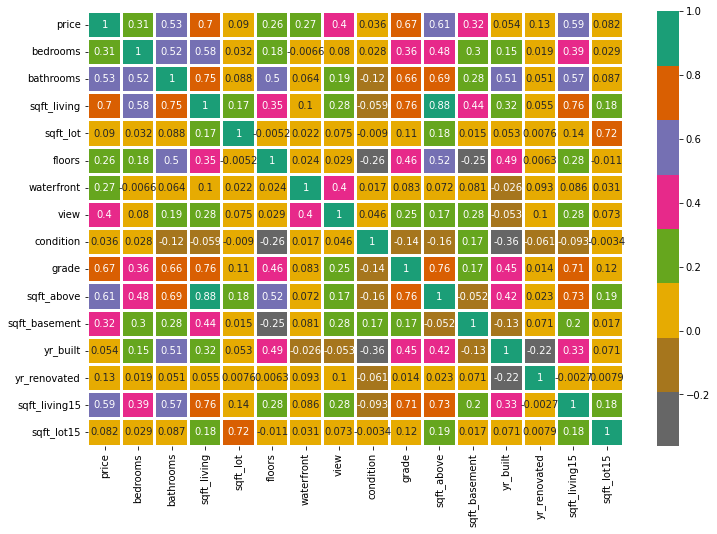

In [104]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [105]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [107]:
#Listado de Resultados
resultados_MAE_Multiple = list()
resultados_R2_Multiple = list()

##1er. Modelo (Regresión Lineal: Múltiple)

In [108]:
lr_mult_mdl = LinearRegression()
#Entrenamiento del modelo
lr_mdl.fit(X_train, y_train)

lr_mdl.coef_, lr_mdl.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

###Modelo de estimación obtenido:

$\hat{y} = -38200.804804X + 41466.1X_2+ 107.99X_3 +...-0.548X_{15} + 6151359.26$

In [109]:
#Predicciones del modelo
y_pred = lr_mdl.predict(X_test)

In [110]:
#Metrícas del modelo de Regresión Lineal
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE_Multiple.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2_Multiple.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


#2do. Modelo (Regresión Lineal: Poly Features-Múltiple)

In [111]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [112]:
#Entrenamiento del modelos lineal utilizando la transformación polinomial
lrp_mdl = LinearRegression()
lrp_mdl.fit(X_train_poly, y_train)
lrp_mdl.coef_, lrp_mdl.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

###Modelo de estimación obtenido:

$\hat{y} = 933912.83X + 1093307.30X_2+ 456.44X_3 +...-0.00000235X_{n} + 80227028.31$

In [113]:
#Predicciones del modelo utilizando caracteristicas polinomial
X_test_poly = poly_features.transform(X_test)
y_pred_poly = lrp_mdl.predict(X_test_poly)

#Metrícas del modelo utilizando caracteristicas polinomiales
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_poly))
resultados_MAE_Multiple.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2_score(y_test,  y_pred_poly))
resultados_R2_Multiple.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


#3er. Modelo (Ridge-Múltiple)


In [114]:
rg_mdl = Ridge(alpha=10)          #Se Crea el Objeto del Modelo de Ridge

rg_mdl.fit(X_train, y_train)      #Entrenamiento del modelo

rg_mdl.coef_, rg_mdl.intercept_   #Coeficientes del modelo

(array([[-3.83707471e+04,  4.13194209e+04,  1.08194563e+02,
          1.52368945e-02,  3.16654180e+04,  5.11363720e+05,
          4.31720395e+04,  2.12599549e+04,  1.19274452e+05,
          4.80756899e+01,  6.01188367e+01, -3.54707415e+03,
          1.37932554e+01,  2.88166253e+01, -5.46903239e-01]]),
 array([6145564.30930104]))

###Modelo de estimación obtenido:

$\hat{y} = -38370.804804X + 41319.4X_2+ 456.19X_3 +...-0.546X_{15} + 6145564.30$

In [115]:
#Predicciones del modelo
y_pred = rg_mdl.predict(X_test)

#Metrícas del modelo de Ridge
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE_Multiple.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2_Multiple.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137585.19973837206
Root Mean Squared Error: 232447.74672687982
r2_score 0.6570452743997186


##4to. Modelo (Lasso-Múltiple)

In [116]:
#Se crea el objeto del Modelo de Lasso
lso_mdl = Lasso(alpha=0.5)
#Entrenamiento del modelo
lso_mdl.fit(X_train, y_train)
lso_mdl.coef_, lso_mdl.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82001697e+04,  4.14639974e+04,  2.93481362e+02,  1.71319410e-02,
         3.16894162e+04,  5.52616066e+05,  4.12521441e+04,  2.12207672e+04,
         1.19492527e+05, -1.37711415e+02, -1.25270275e+02, -3.55087610e+03,
         1.32615337e+01,  2.90056291e+01, -5.48134339e-01]),
 array([6151319.68832076]))

##Modelo de estimación obtenido:

$\hat{y} = -38200.16X + 41463.9X_2+ 293.48X_3 +...-0.548X_{15} + 6151319.68$

In [117]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
resultados_MAE_Multiple.append( metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))
resultados_R2_Multiple.append(r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137585.19973837206
Root Mean Squared Error: 232447.74672687982
r2_score 0.6570452743997186


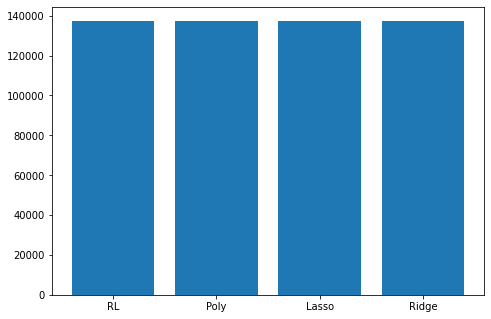

In [118]:
#Graficado de la metrica MAE de los cuatro modelos
mdl_names = ["RL","Poly","Lasso","Ridge"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdl_names,resultados_MAE_Multiple)
plt.show()

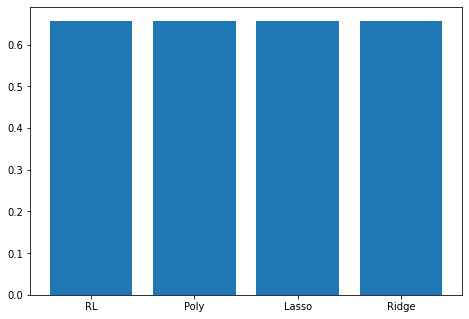

In [119]:
#Graficado de la metrica R2 de los cuatro modelos
mdl_names = ["RL","Poly","Lasso","Ridge"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdl_names,resultados_R2_Multiple)
plt.show()

##Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El método que conviene más a la empresa es de Regresión Lineal Múltiple utilizando características polinomiales, debido a que presenta el menor error absoluto promedio de los cuatro modelos, que es de 121314. También es el modelo que presenta la mayor R2 de los cuatro modelos, esta se encuentra en 0.77. A diferencia de los otros modelos,  regresión lineal utilizando características polinomiales requiere de que la variable sea manipulada para obtener un conjunto de datos derivado, lo que le agrega cierta complejidad al modelo obtenido. Por otra parte los cuatro modelos entrenados presentan métricas similares como lo podemos apreciar en la gráfica de barras de la métrica MAE y R2. El porcentaje de entrenamiento utilizado fue de 90% de datos de entrenamiento y el 10% fue utilizado para prueba. El error obtenido para los diferentes modelos se encuentra entre el valor de 14000 aproximadamente, un poco elevado en comparación con los modelos de regresión lineal simple, sin embargo este porcentaje de puede ser disminuido por medio de alguana de las tecnicas de optimización. Lo sabemos por qué lo estamos midiendo, graficando y observando en el comportamiento del modelo.